<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/neuralnets/YOLO_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔍 YOLO Object Detection Tutorial

**Author:** Shivaji Mallela

**Mentor:** Dr. Olcay Kursun

The initial draft of this document was prepared my research assistant, Shivaji Mallela, as part of our mentored research work. The first version can be found at: https://github.com/ShivajiMallela/Finetuning_YOLO/blob/main/YOLO_tutorial.ipynb

This tutorial is part of a research effort supported by the National Science Foundation under grants **#2003740** and **#2435093** *(PI: Dr. Kursun, Auburn University at Montgomery)*. Our broader research explores the use of deep learning across diverse datasets, including texture images, hyperspectral imagery, tactile signal data, and bacteria colony images captured with cellphone cameras (some examples are shown below).


In this notebook, we’ll demonstrate how to use **YOLO (You Only Look Once)** for object detection using simpler, easy-to-understand image datasets. While the examples have been simplified for educational purposes, the techniques covered here are applicable to more complex and specialized datasets used in ongoing research.

## What is YOLO?

YOLO stands for You Only Look Once. It is a real-time object detection model that detects objects in an image in one go. Unlike older methods that first locate objects and then classify them, YOLO does everything in one single step — making it fast and accurate.


For more information about YOLO: https://docs.ultralytics.com/

## Using YOLO Model for Colony Detection in Biomedical Imaging

As an exemplary application in the context of biomedical imaging, we use a large biomedical dataset (https://www.nature.com/articles/s41597-023-02404-8) which contains images of bacterial plates, rather than the watermelon images used in the previous example. This dataset is publicly available and is employed to train the YOLO model. Subsequently, once the detector is trained on a large dataset, it can be applied to our own smaller in-house image collections, where traditional CNNs can then be used to classify the detected colonies.

Here are some results from applying YOLO detection to images of bacterial colonies:

<img src="https://raw.githubusercontent.com/ShivajiMallela/Finetuning_YOLO/refs/heads/main/images/MixSp01_imgcrop.jpeg" width="300" height="300" style="margin-right: 10px;">
<img src="https://raw.githubusercontent.com/ShivajiMallela/Finetuning_YOLO/refs/heads/main/images/MixSp02_imgcrop.jpeg" width="300" height="300">




### ✅ Install YOLOv8 by Ultralytics
First, we install the Ultralytics package that provides YOLOv8.

v8 represents the version of the YOLO

Before running the below code cell, Change runtime type to access the GPU in the colab

GO TO:

`Runtime > Change runtime type > Hardware accelerator: T4 GPU`

In [ ]:
# Install Ultralytics - it provides YOLOv8 out of the box
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import zipfile
import gdown

def download_and_extract_dataset(target_dir=''):
    file_id = "1_bJ1YqHo7l5rerx1YC__uH2At8OPkHdq"
    archive_path = "watermelon_dataset.zip"

    if os.path.exists(target_dir):
        print("Dataset already extracted.")
        return

    # Download using gdown
    print("Setting up the dataset...")
    gdown.download(id=file_id, output=archive_path, quiet=False)

    # Extract zip
    print("Extracting...")
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)
    print("Extraction complete.")

download_and_extract_dataset()

Setting up the dataset...


Downloading...
From: https://drive.google.com/uc?id=1_bJ1YqHo7l5rerx1YC__uH2At8OPkHdq
To: /content/watermelon_dataset.zip
100%|██████████| 1.42M/1.42M [00:00<00:00, 12.0MB/s]

Extracting...
Extraction complete.


Now you can access the files in your drive through `📁 (files icon)` located at the

left side (👈) of your colab notebook.

The YOLO model is originally trained to detect and classify 80 different objects (referred to as classes). Now, let's find out what those 80 classes are.

In [ ]:
# import the YOLO model
from ultralytics import YOLO

# Load the pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Get the class names
class_names = model.names

class_list = list(class_names.items())

# Print in 2 columns
for i in range(0, len(class_list), 2):
    left = f"{class_list[i][0]:>2}: {class_list[i][1]:<15}"
    if i+1 < len(class_list):
        right = f"{class_list[i+1][0]:>2}: {class_list[i+1][1]:<15}"
    else:
        right = ""
    print(f"{left}    {right}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 100MB/s]

 0: person              1: bicycle        
 2: car                 3: motorcycle     
 4: airplane            5: bus            
 6: train               7: truck          
 8: boat                9: traffic light  
10: fire hydrant       11: stop sign      
12: parking meter      13: bench          
14: bird               15: cat            
16: dog                17: horse          
18: sheep              19: cow            
20: elephant           21: bear           
22: zebra              23: giraffe        
24: backpack           25: umbrella       
26: handbag            27: tie            
28: suitcase           29: frisbee        
30: skis               31: snowboard      
32: sports ball        33: kite           
34: baseball bat       35: baseball glove 
36: skateboard         37: surfboard      
38: tennis racket      39: bottle         
40: wine glass         41: cup            
42: fork               43: knife          
44: spoon              45: bowl           
46: banana 

Above, we see the 80 different classes on which the model is trained. It starts with 0 (person) and ends at 79 (toothbrush).

The model has already been trained and is available as open-source, which we can use directly by importing it from a library called Ultralytics.

Now, let's see how it works.

Let's take an image that includes one of these 80 classes.

For example, we'll use an image of a dog from Google:

https://cdn.royalcanin-weshare-online.io/pCJJPmYBaxEApS7LeAbn/v1/ed7h-how-to-buy-a-puppy-hero-dog?w=1440&fm=jpg&auto=format%2Ccompress

Lets download the image

In [ ]:
# Downloading the image and name it as puppy.jpg
import requests

# Direct image URL (must end with .jpg, .png, etc.)
url = "https://cdn.royalcanin-weshare-online.io/pCJJPmYBaxEApS7LeAbn/v1/ed7h-how-to-buy-a-puppy-hero-dog?w=1440&fm=jpg&auto=format%2Ccompress"

# Send a request to the URL
response = requests.get(url)

# Save the image as a file
with open("puppy.jpg", "wb") as f:
    f.write(response.content)

Let's display the downloaded image using Matplotlib

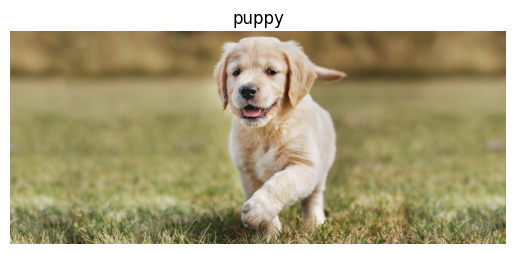

In [ ]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("puppy.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("puppy")
plt.show()

Now we'll use this image to test the YOLO model that we imported

In [ ]:
# test the model and save the results in a variable named `output`.
output = model.predict(source="/content/puppy.jpg", save=True)


image 1/1 /content/puppy.jpg: 288x640 1 dog, 49.0ms
Speed: 10.3ms preprocess, 49.0ms inference, 340.0ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict


Now our results are saved in the `runs/detect/predict`

Let's look at the output of the YOLO model

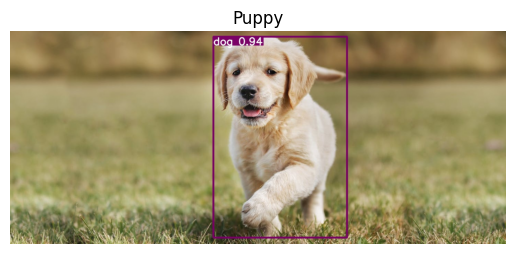

In [ ]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/predict/puppy.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Puppy")
plt.show()

So YOLO model detects the dog in the given image and also plots the box around that.

What we did above was to provide an image to the YOLO model, and the model output indicated that the image contains a dog. It also plotted a box around the dog and displayed that the model is 94% (0.94) confident in its prediction.

But where is all this information stored?

The information is stored in a variable named `output`. In the code cell above, where we provided the image to the YOLO model, we stored the results of the predictions in a variable called `output`. So, let's take a look at the `output`.

In [ ]:
# Let's look at what is in the 'output' variable

output[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.], device='cuda:0')
conf: tensor([0.9408], device='cuda:0')
data: tensor([[5.9068e+02, 1.6834e+01, 9.7866e+02, 5.9854e+02, 9.4084e-01, 1.6000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (617, 1440)
shape: torch.Size([1, 6])
xywh: tensor([[784.6732, 307.6861, 387.9768, 581.7052]], device='cuda:0')
xywhn: tensor([[0.5449, 0.4987, 0.2694, 0.9428]], device='cuda:0')
xyxy: tensor([[590.6848,  16.8335, 978.6616, 598.5387]], device='cuda:0')
xyxyn: tensor([[0.4102, 0.0273, 0.6796, 0.9701]], device='cuda:0')

Let's understand `output`:

`cls` - Class: This represents the class number that the model predicted. Here, it predicted class 16, which corresponds to a dog among the 80 classes.

`conf` - Confidence Score: This indicates how confident the model is about the predicted class.

`xywhn` - X_center, Y_center, Width, Height, n(normalized): These are the coordinates of the box that is drawn around the dog.

### Testing YOLO with an object that is not among the 80 classes

What if we provide an image that contains an object not among the 80 classes that the model is trained on?

What will the result be?

Let's take an image of a watermelon from Google and try it with the YOLO model!

https://i.ytimg.com/vi/3f967i5mHQI/maxresdefault.jpg

In [ ]:
# Downloading the image and name it as watermelon.jpg
import requests

# Direct image URL (must end with .jpg, .png, etc.)
url = "https://i.ytimg.com/vi/3f967i5mHQI/maxresdefault.jpg"

# Send a request to the URL
response = requests.get(url)

# Save the image as a file
with open("watermelon.jpg", "wb") as f:
    f.write(response.content)

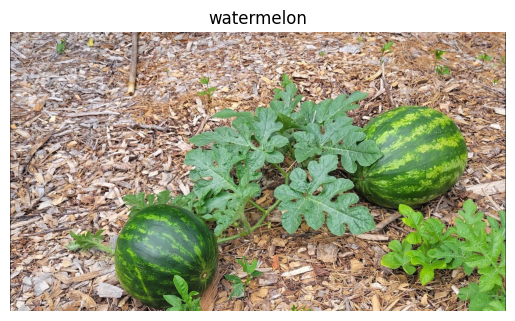

In [ ]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("watermelon.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("watermelon")
plt.show()

In [ ]:
# test the model and save the results in a variable named `output_2`.
output_2 = model.predict(source="/content/watermelon.jpg", save=True)


image 1/1 /content/watermelon.jpg: 384x640 1 vase, 67.5ms
Speed: 2.3ms preprocess, 67.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


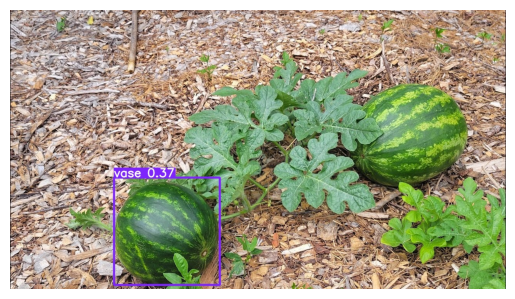

In [ ]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/predict/watermelon.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Here if we see, the YOLO model was only able to detect one watermelon and it classified the detected part in the image as `vase` instead of `watermelon`.

There's nothing wrong with the model here. The issue is that it only recognizes the 80 objects it has been trained on. So, whenever we provide an image, the model attempts to identify any of the trained objects and classifies it based on its training.

To overcome this limitation, we can use a method called `Finetuning`. This means we can take the existing model and train it further with a desired dataset to enable it to recognize new objects.

Since we need the model to detect watermelons, we will now train it using images of watermelons. This way, the model will be able to detect and classify all the watermelons in the image.

In order to train the model we need to have the dataset that contains watermelon images.

please access the below link to get the data:

https://universe.roboflow.com/vietnamese-fruit-dectection-xi3gb/water-melon-detection--single-object/dataset/1

Please download the dataset from the link and upload it in your drive

## Finetuning YOLO

In [ ]:
from ultralytics import YOLO

model = YOLO(model='yolov8n.pt')

model.train(
    data="watermelon_dataset/data.yaml", #the path of "data.yml" file
    epochs=30,
    project="runs/detect",  # folder for all the runs
    name="watermelon_run",  # the folder for a particular run
    exist_ok=True,  # overwrite if exists
    degrees=10,
    translate=0.2,
    scale=0.6,
    shear=2.0,
    perspective=0.001,
    flipud=0.1,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.02,
    hsv_s=0.5,
    hsv_v=0.5,
    auto_augment='randaugment'
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=watermelon_dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=watermelon_run, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.2MB/s]


AMP: checks passed ✅


train: Scanning /content/watermelon_dataset/labels/train... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 2225.80it/s]

train: New cache created: /content/watermelon_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/watermelon_dataset/labels/val... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 1187.28it/s]

val: New cache created: /content/watermelon_dataset/labels/val.cache


Plotting labels to runs/detect/watermelon_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/watermelon_run
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.03G      1.778      3.146      2.062         38        640: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         24         26    0.00393          1      0.386      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.25G      1.728      3.085      2.109         45        640: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         24         26    0.00372          1      0.417      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.27G      1.623      3.045      2.053         35        640: 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         24         26    0.00346          1      0.402      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.28G      1.441      2.841       1.87         44        640: 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         24         26    0.00356          1      0.357      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.3G      1.401      2.633      1.835         42        640: 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         24         26    0.00424          1      0.439      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.32G      1.297      2.252      1.698         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         24         26    0.00392          1      0.488      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.34G      1.241      2.248      1.659         33        640: 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         24         26    0.00373          1      0.511      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.36G       1.34      2.022        1.7         37        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         24         26    0.00374          1      0.538       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.38G      1.246      1.846      1.653         51        640: 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         24         26     0.0039          1      0.544      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       2.4G      1.269      1.801      1.672         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         24         26    0.00412          1      0.519      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.41G      1.281      1.751      1.631         33        640: 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         24         26        0.4      0.955      0.595      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.43G      1.274      1.725      1.584         42        640: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         24         26          1      0.112      0.701      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.45G      1.265      1.719      1.626         42        640: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         24         26      0.977      0.474      0.696      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.46G      1.266      1.545       1.59         39        640: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         24         26      0.976      0.448      0.741      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.48G      1.305      1.742      1.747         35        640: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         24         26      0.977      0.473      0.907      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.5G      1.207      1.585      1.575         36        640: 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         24         26      0.771      0.705      0.897      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.51G      1.335      1.508      1.597         43        640: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         24         26      0.727      0.869      0.817      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.53G       1.26      1.531      1.559         45        640: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         24         26      0.693      0.852      0.838      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.55G      1.205      1.447      1.647         48        640: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         24         26      0.743      0.852       0.84      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.56G      1.096      1.364      1.457         39        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         24         26      0.824      0.852      0.851      0.537


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.59G       0.92      2.028      1.572         16        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         24         26      0.769      0.922      0.913      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       2.6G     0.9394      1.949      1.569         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         24         26      0.769      0.818      0.937      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.62G     0.9078      1.855      1.539         15        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         24         26      0.889      0.914      0.982      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.64G     0.8816      1.843      1.557         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         26      0.919      0.722      0.967      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.65G      0.928      1.957       1.51         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         24         26      0.923      0.634      0.973      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.67G     0.8105      1.738      1.353         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         24         26      0.896      0.752      0.938      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.69G      0.866      1.677      1.344         13        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         24         26      0.913      0.711      0.935       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       2.7G     0.8914      1.672      1.616         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         24         26      0.728      0.625      0.848      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.72G     0.9071      1.632      1.476         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         24         26      0.728      0.625      0.848      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.74G     0.7916      1.604      1.391         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         24         26       0.71      0.625      0.849      0.576



30 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/watermelon_run/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/watermelon_run/weights/best.pt, 6.2MB

Validating runs/detect/watermelon_run/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


                   all         24         26      0.913       0.71      0.935       0.61
            watermelon         20         22      0.826          1      0.982      0.627
     watermelon-peeled          4          4          1       0.42      0.888      0.593
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/watermelon_run


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8c07df5550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

After the Model training was successfully completed. Test the model with the same watermelon image and see what it does.

In [ ]:
output_3 = model.predict(
    source="/content/watermelon.jpg",
    save=True,
    project="runs/detect",
    name="watermelon_run",
    exist_ok=True
)



image 1/1 /content/watermelon.jpg: 384x640 1 watermelon, 16.5ms
Speed: 2.3ms preprocess, 16.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/watermelon_run


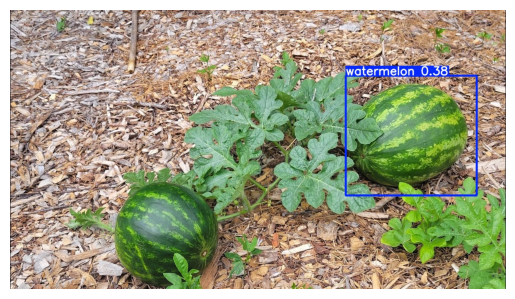

In [ ]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/watermelon_run/watermelon.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Progress! The model successfully detected one of the watermelons in the image and drew a bounding box around it.

As an exercise, try adjusting the training parameters or augmentations to help YOLO detect both watermelons more reliably.